**TDA 231 Machine Learning: Homework 0**  
**Goal: Introduction to Probability, Ipython Primer**  
**Grader: Aristide, Mikael**  
**Due Date: 26/3**  
**Submitted by:  
Sebastian Bergström  
Jan Liu, lijan@student.chalmers.se**

General guidelines:
* All solutions to theoretical problems, can be submitted as a single file named *report.pdf*. They can also be submitted in this ipynb notebook, but equations wherever required, should be formatted using LaTeX math-mode.
* All discussion regarding practical problems, along with solutions and plots should be specified here itself. We will not generate the solutions/plots again by running your code.
* Your name, personal number and email address should be specified above and also in your file *report.pdf*.
* All datasets can be downloaded from the course website.
* All tables and other additional information should be included.

# Practical problems

## [Plotting normal distributed points, 5 points]

Generate $1000$ points from 2D multivariate normal
distribution having mean $\mu = \left[
\begin{array}{c}
  1  \\
  1
\end{array}
\right]$ and covariance $\Sigma =
\left[
  \begin{array}{rr}
    0.1 & -0.05 \\
    -0.05&  0.2
  \end{array}
\right]
$.  Define the function $f({\bf x}, r) := \frac{({\bf x} - \mu)^{ \top } * \Sigma^{-1} *
  ({\bf x} - \mu) }{ 2} - r $. On a single plot, show the following:
* The level sets $f({\bf x}, r) = 0$ for $r=1, 2, 3$.
* Scatter plot of randomly generated points with points lying
outside $f({\bf x} , 3) = 0$ showing in black while points inside shown in
blue.
* Title of the plot showing how many points lie outside $f({\bf
    x}, 3) = 0$.
Submit your final plot as well as your implementation.

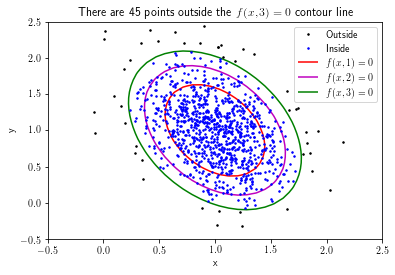

In [1]:
%matplotlib inline

import numpy as np
from numpy.linalg import inv
from numpy.random import multivariate_normal as mvnrnd
import matplotlib.pyplot as plt
import matplotlib

def f(x,mu,sigma,r):
    a = (x-mu).transpose() @ inv(sigma) @ (x-mu) / 2 - r
    return np.asscalar(a)

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

mu = np.matrix([[1],[1]])
sigma = np.matrix([[0.1, -0.05],[-0.05, 0.2]])
a = np.vectorize(lambda x,y,r:f([[x],[y]],mu,sigma,r))
x = np.linspace(-1,3)
X,Y = np.meshgrid(x,x)

contour_colors = ('r','m','g')
plt.figure()
CS = plt.contour(X,Y,a(X,Y,3),[-2,-1,0],colors=contour_colors)
labels = ['$f(x,1)=0$', '$f(x,2)=0$','$f(x,3)=0$']
for label, collection in zip(labels, CS.collections):
    collection.set_label(label)

rnd_points = mvnrnd(np.squeeze(np.asarray(mu)),sigma,1000)
outside = a(rnd_points[:,0], rnd_points[:,1], 3) > 0
plt.plot(rnd_points[outside, 0], rnd_points[outside, 1],marker='.',color='black',linestyle='none',markersize=3, label='Outside')
plt.plot(rnd_points[~outside, 0], rnd_points[~outside, 1],marker='.',color='b',linestyle='none',markersize=3, label='Inside')
plt.axis([-0.5,2.5,-0.5,2.5]);
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('There are {} points outside the $f(x,3)=0$ contour line'.format(np.count_nonzero(outside)));


## [Covariance and correlation, 5 points]
Load dataset0.txt ($X$) containing 1074 data points
each having 12 features related to US schools. Compute the covariance
and correlation matrix for $X$. Scale each feature
in $X$ between $[0, 1]$ to obtain a new dataset $Y$. Compute the
covariance and correlation matrices for $X$ and $Y$, and plot them (e.g. as colormaps).
What do you observe? Show a scatter plot of the pair of features in $Y$ having minimum
correlation, indicating in the title the feature indices and the
correlation value. Submit the plots, comments and your implementation.

Text(0.5,1,'Correlation between feature 11 and feature 7 is 0.038')

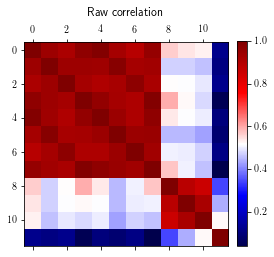

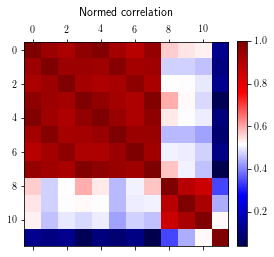

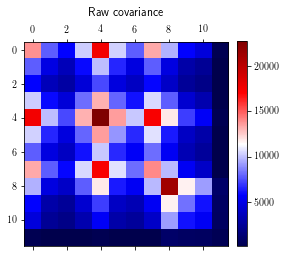

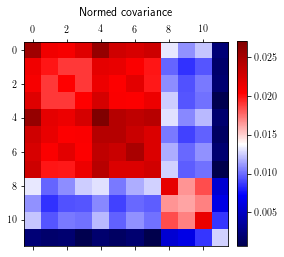

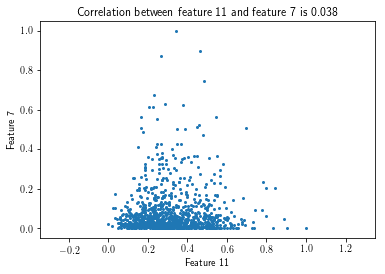

In [2]:
def data_normalization(data):
    minValues = data.min(0)
    maxValues = data.max(0)
    interval = maxValues-minValues
    return ((data - minValues)/interval).transpose()
    
data = np.loadtxt("dataset0.txt")
normed_data = data_normalization(data)
data = data.transpose()
corr = np.corrcoef(normed_data)

def plotty(title, data):
    im = plt.matshow(data,cmap='seismic')
    plt.colorbar(im, fraction=0.046, pad=0.04)
    plt.title(title, y=1.1)
    
args = [('Raw correlation', np.corrcoef(data)),
        ('Normed correlation', np.corrcoef(normed_data)),
        ('Raw covariance', np.cov(data)),
        ('Normed covariance', np.cov(normed_data))]

for title, data in args:
    plotty(title, data)

ind0, ind1 = np.unravel_index(np.abs(corr).argmin(), corr.shape)
plt.figure()
plt.axis('equal')
plt.xlabel('Feature {}'.format(ind0))
plt.ylabel('Feature {}'.format(ind1))
plt.plot(normed_data[ind1,:],normed_data[ind0,:],'.',markersize=4)
plt.title('Correlation between feature {} and feature {} is {:.3f}'.format(ind0, ind1, corr[ind0,ind1]))